# THE SPARKS FOUNDATION

## Exploratory Data Analysis - Retail

#### Importing all essential python libraries



In [16]:
import numpy as np      #numpy for numerical dataset and array computing


import pandas as pd     #pandas for data manipulation and analysis



import matplotlib.pyplot as plt     #matplotlib for plotting plots/graphs



import seaborn as sns     #seaborn for data visualisations

dataset=pd.read_csv("D:\\SampleSuperstore.csv")     #reading comma seperated valued (CSV) 


#reading first five entries
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### total rows and columns in dataset

In [17]:
dataset.shape

(9994, 13)

#### interpreting all data types

In [18]:
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### getting all standard measures

In [19]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
dataset.isnull().mean()

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

#### Target Feature and Independent features 

In [21]:
X=dataset.drop(["Profit"],axis=1)
Y=dataset[["Profit"]]

### Create categorical features' and numeric features' dataframes

In [22]:

# Create a dataframe for numeric features
num=X.select_dtypes(include='number')


char=X.select_dtypes(include='object')
num

,Postal Code,Sales,Quantity,Discount
0,42420,261.9600,2,0.00
1,42420,731.9400,3,0.00
2,90036,14.6200,2,0.00
3,33311,957.5775,5,0.45
4,33311,22.3680,2,0.20
...,...,...,...,...
9989,33180,25.2480,3,0.20
9990,92627,91.9600,2,0.00
9991,92627,258.5760,2,0.20
9992,92627,29.6000,4,0.00


#### Create a dataframe for numeric features and Create a dataframe for categorical features

In [23]:
char

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


#### to study the ranks and plots

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')

C:\Users\Tanmay Dhawale\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Tanmay Dhawale\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


In [25]:
num_y_combined=pd.concat([num_binned, Y],axis=1,join='inner')
num_y_combined.head()

,Postal Code_Rank,Sales_Rank,Quantity_Rank,Discount_Rank,Profit
0,3.0,7.0,1.0,0.0,41.9136
1,3.0,9.0,2.0,0.0,219.5820
2,7.0,2.0,1.0,0.0,6.8714
3,3.0,9.0,4.0,2.0,-383.0310
4,3.0,3.0,1.0,1.0,2.5164


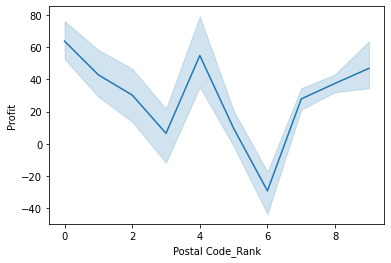

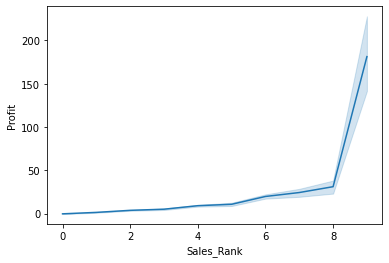

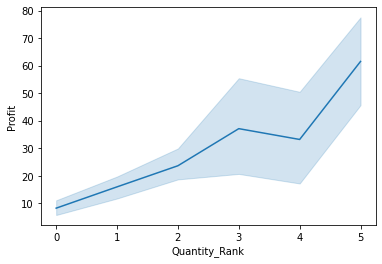

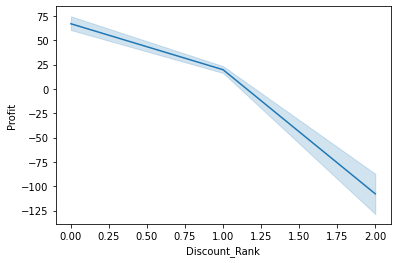

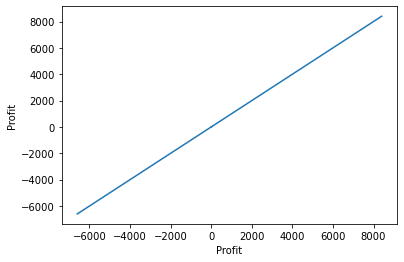

In [26]:
from numpy import mean
for columns in num_y_combined:
       plt.figure()
       sns.lineplot(x=columns, y="Profit",data=num_y_combined, estimator=mean )
plt.show()

In [27]:
char_y_combined=pd.concat([char, Y],axis=1,join='inner')
char_y_combined.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,2.5164


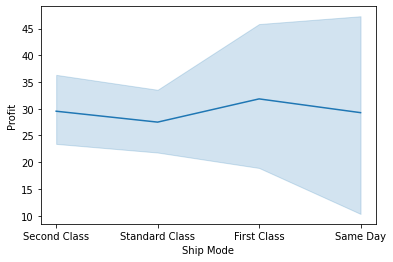

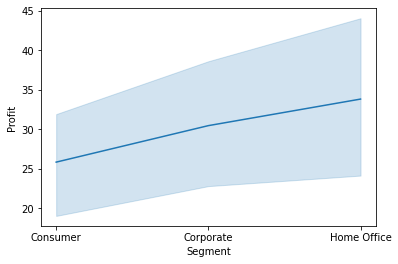

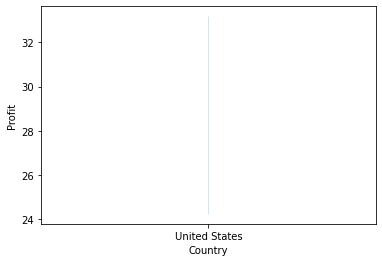

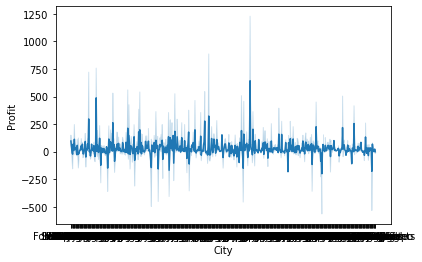

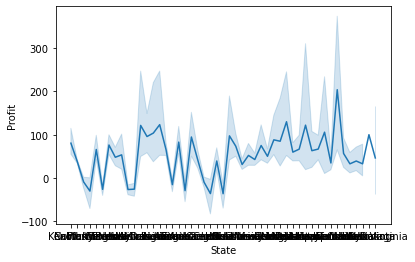

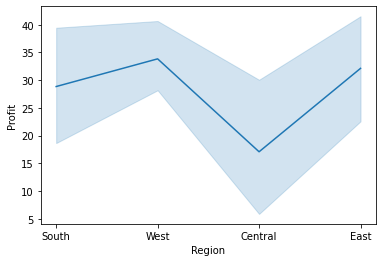

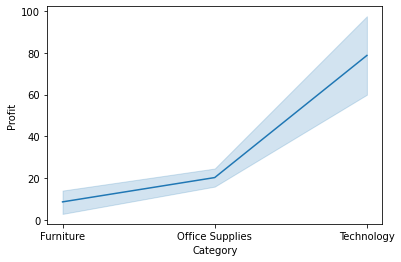

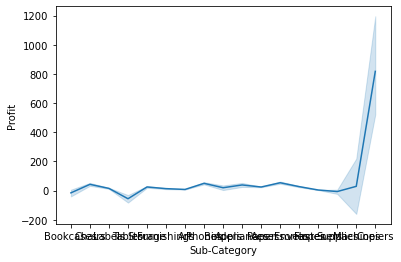

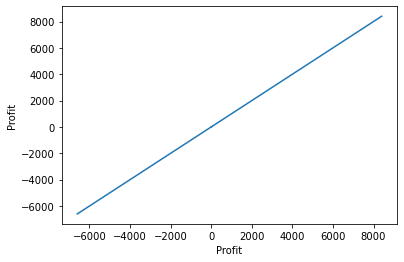

In [28]:
from numpy import mean
for columns in char_y_combined:
       plt.figure()
       sns.lineplot(x=columns, y="Profit",data=char_y_combined, estimator=mean )
plt.show()

#### Describing percentiles

In [30]:
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.99])

,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203
std,32063.693350,623.245101,2.225110,0.206452
min,1040.000000,0.444000,1.000000,0.000000
1%,2149.000000,2.286000,1.000000,0.000000
5%,10009.000000,4.980000,1.000000,0.000000
25%,23223.000000,17.280000,2.000000,0.000000
50%,56430.500000,54.490000,3.000000,0.200000
75%,90008.000000,209.940000,5.000000,0.200000
90%,94122.000000,572.706000,7.000000,0.400000


#### defining the function outlier_cap

In [31]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [32]:
num=num.apply(lambda x : outlier_cap(x))
num.describe(percentiles=[0.01,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.651191,209.365508,3.773164,0.156203
std,32056.519514,394.795901,2.162163,0.206452
min,2149.000000,2.286000,1.000000,0.000000
1%,2149.000000,2.286000,1.000000,0.000000
10%,10024.000000,7.897200,2.000000,0.000000
15%,13021.000000,10.776000,2.000000,0.000000
20%,19140.000000,13.776000,2.000000,0.000000
25%,23223.000000,17.280000,2.000000,0.000000
50%,56430.500000,54.490000,3.000000,0.200000


#### describing standard percentile measures  

In [33]:
from sklearn.feature_selection import VarianceThreshold
varcutoff=VarianceThreshold()
num=pd.DataFrame(varcutoff.fit_transform(num),index=num.index,columns=num.columns)
num.describe()

,Postal Code,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.651191,209.365508,3.773164,0.156203
std,32056.519514,394.795901,2.162163,0.206452
min,2149.000000,2.286000,1.000000,0.000000
25%,23223.000000,17.280000,2.000000,0.000000
50%,56430.500000,54.490000,3.000000,0.200000
75%,90008.000000,209.940000,5.000000,0.200000
max,98115.000000,2481.694600,11.000000,0.800000


#### no feature will be removed as no variable has varience 0

#### Here we are encoding Categorical based Independent Features

In [34]:
char.head()     


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [35]:

char_encode=pd.get_dummies(char)

In [36]:
char_encode.head()


,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,City_Aberdeen,City_Abilene,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Feature Discretization¶


In [37]:

from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
X_binned=pd.DataFrame(Bins.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Bin')
X_binned.head()

C:\Users\Tanmay Dhawale\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\Users\Tanmay Dhawale\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


,Postal Code_Bin,Sales_Bin,Quantity_Bin,Discount_Bin
0,3.0,7.0,1.0,0.0
1,3.0,9.0,2.0,0.0
2,7.0,2.0,1.0,0.0
3,3.0,9.0,4.0,2.0
4,3.0,3.0,1.0,1.0


In [38]:
X_all=pd.concat([X_binned,char_encode],axis=1,join='inner')
X_all.shape

(9994, 616)